In [ ]:
import time
start_time = time.time()

# **Import data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/lichess.csv", delimiter = ",", encoding = "utf-8")

Descriptive statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3386423 entries, 0 to 3386422
Data columns (total 19 columns):
 #   Column           Dtype  
---  ------           -----  
 0   event            object 
 1   white            object 
 2   black            object 
 3   result           object 
 4   UTCDate          object 
 5   day              int64  
 6   month            int64  
 7   year             int64  
 8   UTCTime          object 
 9   whiteELO         float64
 10  blackELO         float64
 11  RatingDiff       float64
 12  whiteRatingDiff  float64
 13  blackRatingDiff  float64
 14  ECO              object 
 15  opening          object 
 16  timeControl      object 
 17  termination      object 
 18  totalMove        int64  
dtypes: float64(5), int64(4), object(10)
memory usage: 490.9+ MB


In [ ]:
df.nunique()

event                  7
white              60997
black              62355
result                 3
UTCDate              366
day                   31
month                 12
year                   2
UTCTime            86400
whiteELO            1749
blackELO            1768
RatingDiff          1141
whiteRatingDiff     1140
blackRatingDiff     1153
ECO                  489
opening             2771
timeControl          978
termination            3
totalMove            168
dtype: int64

In [ ]:
df.head()

,event,white,black,result,UTCDate,day,month,year,UTCTime,whiteELO,blackELO,RatingDiff,whiteRatingDiff,blackRatingDiff,ECO,opening,timeControl,termination,totalMove
0,Rated Correspondence game,felixrbran,wiles,0-1,2013.07.02,2,7,2013,21:16:17,1398.0,1767.0,369.0,-3.0,3.0,A00,Polish Opening,NaN,Normal,25
1,Rated Correspondence game,singhk,bhangooj,0-1,2013.07.12,12,7,2013,04:25:22,1538.0,1461.0,77.0,-113.0,113.0,A00,Grob Opening,NaN,Normal,10
2,Rated Correspondence game,Mrkvak,?,1-0,2013.04.04,4,4,2013,19:44:52,NaN,NaN,NaN,NaN,NaN,A01,Nimzo-Larsen Attack: Modern Variation #4,NaN,Normal,38
3,Rated Correspondence game,Unknown Player,CaLiBRe,1-0,2013.04.09,9,4,2013,19:09:36,NaN,NaN,NaN,NaN,NaN,B01,Scandinavian Defense,NaN,Normal,20
4,Rated Correspondence game,dbalka,Polinusik,1-0,2013.04.11,11,4,2013,19:43:45,1682.0,1122.0,560.0,2.0,-5.0,B02,Alekhine Defense: Mokele Mbembe,NaN,Normal,23


In [ ]:
round(df.describe(), 3)

,day,month,year,whiteELO,blackELO,RatingDiff,whiteRatingDiff,blackRatingDiff,totalMove
count,3386423.000,3386423.000,3386423.000,3380733.000,3380733.000,3380733.000,3380733.000,3380733.000,3386423.000
mean,16.167,8.182,2013.000,1613.270,1603.674,153.787,0.190,-1.751,33.761
std,8.836,3.224,0.006,213.715,219.879,132.403,34.322,39.031,16.016
min,1.000,1.000,2012.000,758.000,735.000,0.000,-620.000,-618.000,0.000
25%,9.000,6.000,2013.000,1473.000,1462.000,54.000,-10.000,-11.000,23.000
50%,16.000,9.000,2013.000,1611.000,1599.000,119.000,2.000,-3.000,32.000
75%,24.000,11.000,2013.000,1753.000,1747.000,216.000,10.000,10.000,43.000
max,31.000,12.000,2013.000,2581.000,2600.000,1376.000,638.000,649.000,191.000


(array([3.305000e+03, 3.371700e+04, 2.019540e+05, 6.790650e+05,
        1.139883e+06, 8.856240e+05, 3.402940e+05, 8.611800e+04,
        1.051800e+04, 2.550000e+02]),
 array([ 758. ,  940.3, 1122.6, 1304.9, 1487.2, 1669.5, 1851.8, 2034.1,
        2216.4, 2398.7, 2581. ]),
 <a list of 10 Patch objects>)

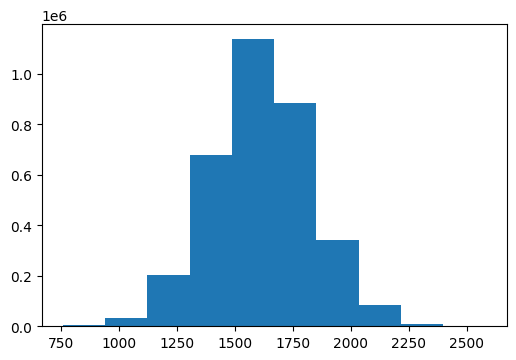

In [ ]:
plt.figure(dpi = 100)
plt.hist(df["whiteELO"])

(array([3.51600e+03, 3.77500e+04, 2.18497e+05, 6.74524e+05, 1.17493e+06,
        8.45662e+05, 3.30081e+05, 8.55040e+04, 1.00240e+04, 2.45000e+02]),
 array([ 735. ,  921.5, 1108. , 1294.5, 1481. , 1667.5, 1854. , 2040.5,
        2227. , 2413.5, 2600. ]),
 <a list of 10 Patch objects>)

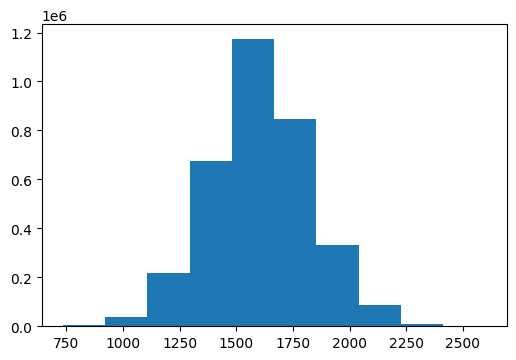

In [ ]:
plt.figure(dpi = 100)
plt.hist(df["blackELO"])

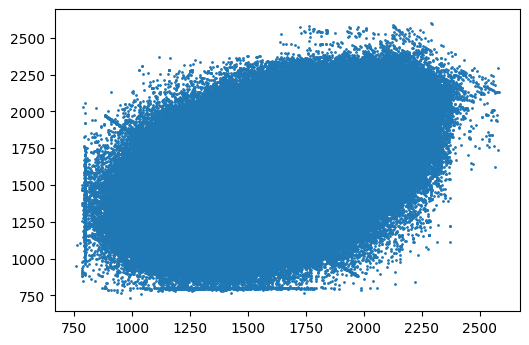

In [ ]:
plt.figure(dpi = 100)
plt.scatter(df["whiteELO"], df["blackELO"], s = 1)

(array([1.888853e+06, 9.534930e+05, 3.618240e+05, 1.247050e+05,
        3.821800e+04, 1.073100e+04, 2.290000e+03, 5.410000e+02,
        6.800000e+01, 1.000000e+01]),
 array([   0. ,  137.6,  275.2,  412.8,  550.4,  688. ,  825.6,  963.2,
        1100.8, 1238.4, 1376. ]),
 <a list of 10 Patch objects>)

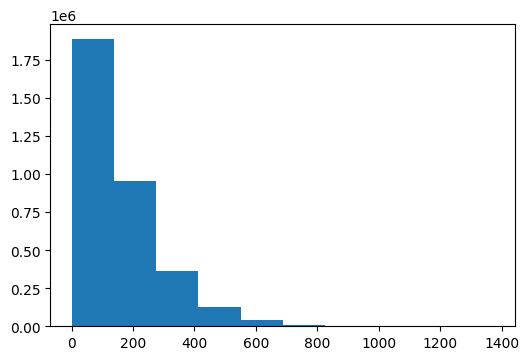

In [ ]:
plt.figure(dpi = 100)
plt.hist(df["RatingDiff"])

(array([5.999770e+05, 1.651938e+06, 8.541940e+05, 2.383920e+05,
        3.582300e+04, 5.001000e+03, 9.240000e+02, 1.510000e+02,
        1.900000e+01, 4.000000e+00]),
 array([  0. ,  19.1,  38.2,  57.3,  76.4,  95.5, 114.6, 133.7, 152.8,
        171.9, 191. ]),
 <a list of 10 Patch objects>)

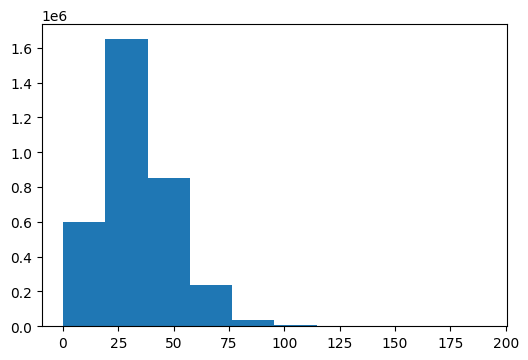

In [ ]:
plt.figure(dpi = 100)
plt.hist(df["totalMove"])

#**Data preparation**

Handle missing value and transform data to float format

In [ ]:
from sklearn.preprocessing import LabelEncoder

x = df[["whiteELO", "blackELO", "ECO", "timeControl", "termination", "totalMove"]]
y = df[["result"]]

# Handle missing value
x["whiteELO"].fillna(round(x["whiteELO"].mean(), 0), inplace = True)
x["blackELO"].fillna(round(x["blackELO"].mean(), 0), inplace = True)
#x["RatingDiff"].fillna(round(x["RatingDiff"].median(), 0), inplace = True)
x["timeControl"].fillna(x["timeControl"].mode().iloc[0], inplace = True)

# Convert data to float
le = LabelEncoder()
x["ECO"] = le.fit_transform(x["ECO"])
x["timeControl"] = le.fit_transform(x["timeControl"])
x["termination"] = le.fit_transform(x["termination"])
y = le.fit_transform(y)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

In [ ]:
x

,whiteELO,blackELO,ECO,timeControl,termination,totalMove
0,1398.0,1767.0,1,708,0,25
1,1538.0,1461.0,1,708,0,10
2,1613.0,1604.0,2,708,0,38
3,1613.0,1604.0,101,708,0,20
4,1682.0,1122.0,102,708,0,23
...,...,...,...,...,...,...
3386418,1692.0,1382.0,41,13,2,19
3386419,1613.0,1618.0,306,708,2,27
3386420,1286.0,1293.0,255,130,2,31
3386421,1646.0,1306.0,244,708,2,22


In [ ]:
y

array([0, 0, 1, ..., 1, 1, 0])

Descriptive statistics after handle missing value

(array([3.305000e+03, 3.371700e+04, 2.019540e+05, 6.790650e+05,
        1.145573e+06, 8.856240e+05, 3.402940e+05, 8.611800e+04,
        1.051800e+04, 2.550000e+02]),
 array([ 758. ,  940.3, 1122.6, 1304.9, 1487.2, 1669.5, 1851.8, 2034.1,
        2216.4, 2398.7, 2581. ]),
 <a list of 10 Patch objects>)

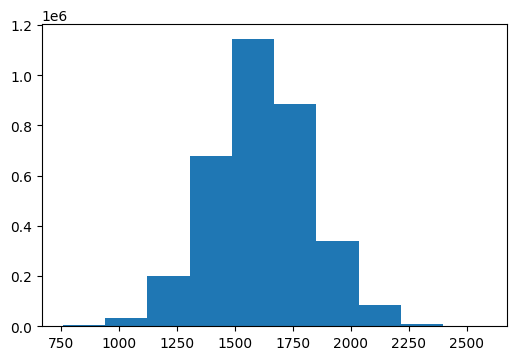

In [ ]:
plt.figure(dpi = 100)
plt.hist(x["whiteELO"])

(array([3.51600e+03, 3.77500e+04, 2.18497e+05, 6.74524e+05, 1.18062e+06,
        8.45662e+05, 3.30081e+05, 8.55040e+04, 1.00240e+04, 2.45000e+02]),
 array([ 735. ,  921.5, 1108. , 1294.5, 1481. , 1667.5, 1854. , 2040.5,
        2227. , 2413.5, 2600. ]),
 <a list of 10 Patch objects>)

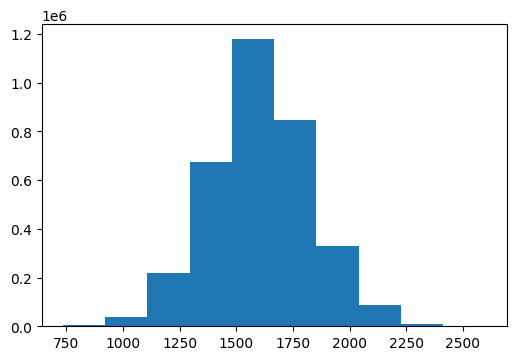

In [ ]:
plt.figure(dpi = 100)
plt.hist(x["blackELO"])

Correlation of ELO of both side: 0.56321 



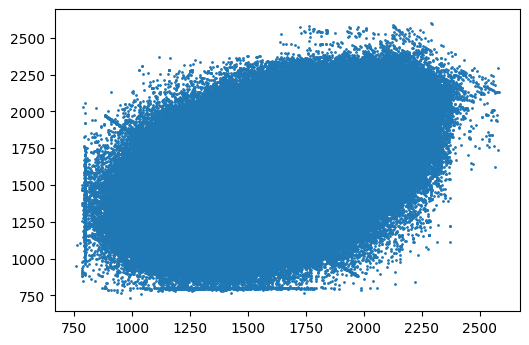

In [ ]:
from scipy import stats
print("Correlation of ELO of both side:", round(stats.pearsonr(x["whiteELO"], x["blackELO"])[0], 5), "\n")

plt.figure(dpi = 100)
plt.scatter(df["whiteELO"], df["blackELO"], s = 1)

In [ ]:
#plt.figure(dpi = 100)
#plt.hist(x["RatingDiff"])

(array([5.999770e+05, 1.651938e+06, 8.541940e+05, 2.383920e+05,
        3.582300e+04, 5.001000e+03, 9.240000e+02, 1.510000e+02,
        1.900000e+01, 4.000000e+00]),
 array([  0. ,  19.1,  38.2,  57.3,  76.4,  95.5, 114.6, 133.7, 152.8,
        171.9, 191. ]),
 <a list of 10 Patch objects>)

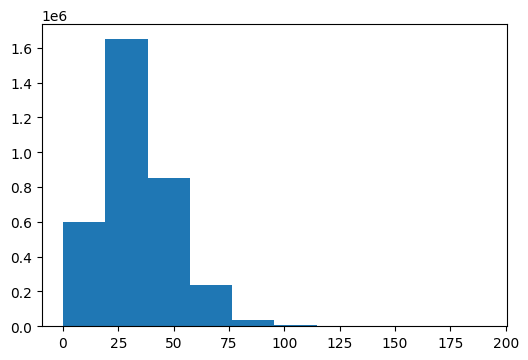

In [ ]:
plt.figure(dpi = 100)
plt.hist(x["totalMove"])

# **Data Modelling**

Splitting data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 48864)

Modelling

In [ ]:
%pip install catBoost

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

class_names = ["0-1","1-0","1/2-1/2"]
scorer = metrics.make_scorer(metrics.f1_score, average = "weighted")
k = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 1)

In [ ]:
LR = LogisticRegression(solver = "lbfgs", multi_class = "multinomial", max_iter = 100)
LR_score = cross_val_score(LR, x_train, y_train, cv = k, scoring = scorer)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
DT = DecisionTreeClassifier()
DT_score = cross_val_score(DT, x_train, y_train, cv = k, scoring = scorer)

In [ ]:
NN = MLPClassifier(solver = "sgd", alpha = 1e-5, activation = "tanh", hidden_layer_sizes = (150, 50))
NN_score = cross_val_score(DT, x_train, y_train, cv = k, scoring = scorer)

In [ ]:
CB = CatBoostClassifier(iterations = 50, learning_rate = 0.1, random_strength = 0.1, depth = 8, loss_function = "MultiClass", leaf_estimation_method = "Newton")
CB_score = cross_val_score(CB, x_train, y_train, cv = k, scoring = scorer)

0:	learn: 1.0418941	total: 1.67s	remaining: 1m 21s
1:	learn: 0.9952469	total: 2.98s	remaining: 1m 11s
2:	learn: 0.9563179	total: 4.29s	remaining: 1m 7s
3:	learn: 0.9233913	total: 5.58s	remaining: 1m 4s
4:	learn: 0.8950877	total: 6.93s	remaining: 1m 2s
5:	learn: 0.8707869	total: 8.23s	remaining: 1m
6:	learn: 0.8497834	total: 9.56s	remaining: 58.7s
7:	learn: 0.8316173	total: 10.9s	remaining: 57.2s
8:	learn: 0.8158750	total: 12.3s	remaining: 55.8s
9:	learn: 0.8021504	total: 13.6s	remaining: 54.5s
10:	learn: 0.7900919	total: 15s	remaining: 53.1s
11:	learn: 0.7793613	total: 16.3s	remaining: 51.8s
12:	learn: 0.7700560	total: 17.7s	remaining: 50.4s
13:	learn: 0.7619895	total: 19.1s	remaining: 49.1s
14:	learn: 0.7547222	total: 20.5s	remaining: 47.8s
15:	learn: 0.7481045	total: 21.9s	remaining: 46.4s
16:	learn: 0.7423365	total: 23.2s	remaining: 45.1s
17:	learn: 0.7375675	total: 24.6s	remaining: 43.8s
18:	learn: 0.7330913	total: 26s	remaining: 42.5s
19:	learn: 0.7288017	total: 27.4s	remaining: 4

Comparison of models score

In [ ]:
print("Comparison of model efficiency base on F1 score\n")
print("LR :", np.around(LR_score, 5))
print("DT :", np.around(DT_score, 5))
print("NN :", np.around(NN_score, 5))
print("CB :", np.around(CB_score, 5))
print("\n")
print("Logistic Regression score        :", round(np.mean(LR_score), 5) , " (", round(np.mean(LR_score) * 100, 5), "% ) standard deviation: ", round(np.std(LR_score) * 100, 2), "%")
print("Decision Tree score              :", round(np.mean(DT_score), 5) , " (", round(np.mean(DT_score) * 100, 5), "% ) standard deviation: ", round(np.std(DT_score) * 100, 2), "%")
print("Multi-layer Perceptron score     :", round(np.mean(NN_score), 5) , " (", round(np.mean(NN_score) * 100, 5), "% ) standard deviation: ", round(np.std(NN_score) * 100, 2), "%")
print("CatBoost score                   :", round(np.mean(CB_score), 5) , " (", round(np.mean(CB_score) * 100, 5), "% ) standard deviation: ", round(np.std(CB_score) * 100, 2), "%")

Comparison of model efficiency base on F1 score

LR : [0.63357 0.63255 0.6324  0.63217 0.63108]
DT : [0.54985 0.5492  0.54965 0.54933 0.54817]
NN : [0.54985 0.54888 0.54944 0.54935 0.5484 ]
CB : [0.6322  0.63263 0.63255 0.63331 0.63294]


Logistic Regression score        : 0.63236  ( 63.23555 % ) standard deviation:  0.08 %
Decision Tree score              : 0.54924  ( 54.92423 % ) standard deviation:  0.06 %
Multi-layer Perceptron score     : 0.54918  ( 54.91845 % ) standard deviation:  0.05 %
CatBoost score                   : 0.63273  ( 63.27266 % ) standard deviation:  0.04 %


Finale Evaluation

In [ ]:
LR.fit(x_train, y_train)
DT.fit(x_train, y_train)
NN.fit(x_train, y_train)
CB.fit(x_train, y_train)

LR_y_pred = LR.predict(x_test)
DT_y_pred = DT.predict(x_test)
NN_y_pred = NN.predict(x_test)
CB_y_pred = CB.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0:	learn: 1.0419453	total: 2.02s	remaining: 1m 38s
1:	learn: 0.9950904	total: 3.74s	remaining: 1m 29s
2:	learn: 0.9561575	total: 5.46s	remaining: 1m 25s
3:	learn: 0.9231216	total: 7.23s	remaining: 1m 23s
4:	learn: 0.8950720	total: 8.95s	remaining: 1m 20s
5:	learn: 0.8707184	total: 10.7s	remaining: 1m 18s
6:	learn: 0.8497293	total: 12.4s	remaining: 1m 16s
7:	learn: 0.8317187	total: 14.2s	remaining: 1m 14s
8:	learn: 0.8158711	total: 15.9s	remaining: 1m 12s
9:	learn: 0.8022628	total: 17.7s	remaining: 1m 10s
10:	learn: 0.7901615	total: 19.4s	remaining: 1m 8s
11:	learn: 0.7794960	total: 21.2s	remaining: 1m 7s
12:	learn: 0.7702290	total: 22.9s	remaining: 1m 5s
13:	learn: 0.7621494	total: 24.7s	remaining: 1m 3s
14:	learn: 0.7547604	total: 26.4s	remaining: 1m 1s
15:	learn: 0.7480489	total: 28.2s	remaining: 59.9s
16:	learn: 0.7424598	total: 29.9s	remaining: 58.1s
17:	learn: 0.7371555	total: 31.7s	remaining: 56.3s
18:	learn: 0.7325683	total: 33.4s	remaining: 54.5s
19:	learn: 0.7283452	total: 35.

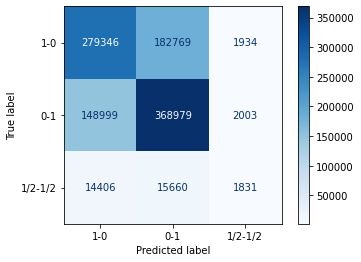

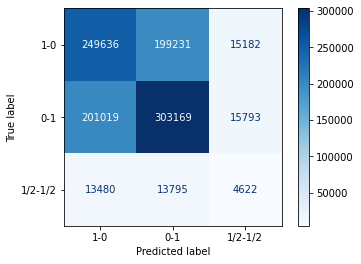

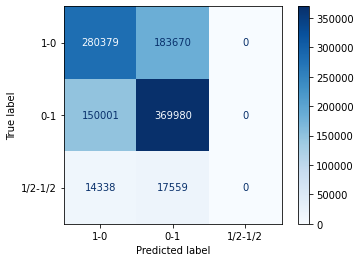

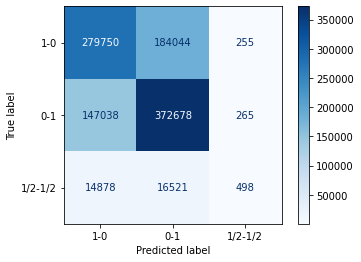

In [ ]:
from sklearn.metrics import plot_confusion_matrix

classes = ["1-0", "0-1", "1/2-1/2"]
plot_confusion_matrix(LR, x_test, y_test, display_labels = classes, cmap = plt.cm.Blues, values_format = ".0f")
plot_confusion_matrix(DT, x_test, y_test, display_labels = classes, cmap = plt.cm.Blues, values_format = ".0f")
plot_confusion_matrix(NN, x_test, y_test, display_labels = classes, cmap = plt.cm.Blues, values_format = ".0f")
plot_confusion_matrix(CB, x_test, y_test, display_labels = classes, cmap = plt.cm.Blues, values_format = ".0f")

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

print("Accuracy for Logistic Regression     :", accuracy_score(y_test, LR_y_pred) * 100, "%")
print("Accuracy for Decision Tree           :", accuracy_score(y_test, DT_y_pred) * 100, "%")
print("Accuracy for Multi-layer Perceptron  :", accuracy_score(y_test, NN_y_pred) * 100, "%")
print("Accuracy for Catboost Classifier     :", accuracy_score(y_test, CB_y_pred) * 100, "%")
print("\n")
print("F1-Score for Logistic Regression     :", f1_score(y_test, LR_y_pred, average = "weighted") * 100, "%")
print("F1-Score for Decision Tree           :", f1_score(y_test, DT_y_pred, average = "weighted") * 100, "%")
print("F1-Score for Multi-layer Perceptron  :", f1_score(y_test, NN_y_pred, average = "weighted") * 100, "%")
print("F1-Score for Catboost Classifier     :", f1_score(y_test, CB_y_pred, average = "weighted") * 100, "%")

Accuracy for Logistic Regression     : 63.99633044500245 %
Accuracy for Decision Tree           : 54.868804549933216 %
Accuracy for Multi-layer Perceptron  : 64.01631219565974 %
Accuracy for Catboost Classifier     : 64.26898783081856 %


F1-Score for Logistic Regression     : 63.18308308567296 %
F1-Score for Decision Tree           : 54.95062326340637 %
F1-Score for Multi-layer Perceptron  : 62.89366400532296 %
F1-Score for Catboost Classifier     : 63.20825827994747 %


In [ ]:
print("--- %s minutes ---" % (round((time.time() - start_time)/60, 2)))

--- 36.6 minutes ---
